In [49]:
import os

import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torch.utils.data import (
    random_split,
    DataLoader,
    Dataset
)
from torchvision.utils import make_grid

Load data


In [32]:
data_dir = "../data"
dataset = ImageFolder(data_dir, transform = tt.ToTensor())

In [33]:
print(len(dataset))
print(dataset.classes)

7553
['with_mask', 'without_mask']


view data from dataset

In [34]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


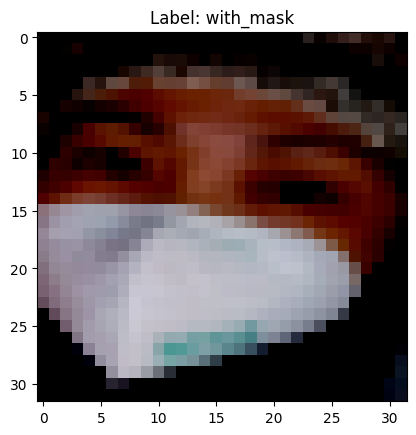

In [63]:
def show_example(data):
    classes = ['with_mask', 'without_mask']
    plt.imshow(data[0].permute(1,2,0))
    plt.title(f'Label: {classes[data[1]]}')

show_example(dataset[13])

Resiziing the image and cropping it to 32*32 pixel image and also normalizing the pixel values.

In [36]:
dataset = ImageFolder(
    data_dir,
    tt.Compose([
    tt.Resize(size=(32,32)),
    tt.ToTensor(),
    tt.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


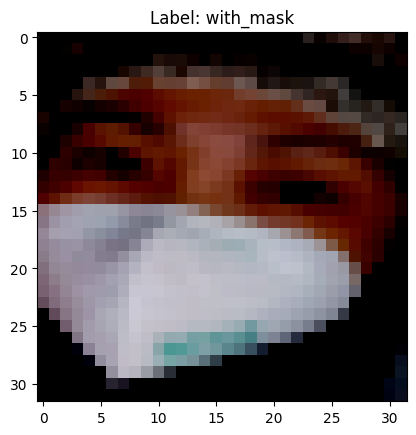

In [37]:
show_example(dataset[13])

Data split train and validation

In [39]:
train_ds, valid_ds = random_split(dataset, [0.8, 0.2])

In [40]:
len(train_ds)

6043

In [41]:
len(valid_ds)

1510

DataLoadet

In [43]:
batch_size = 32
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


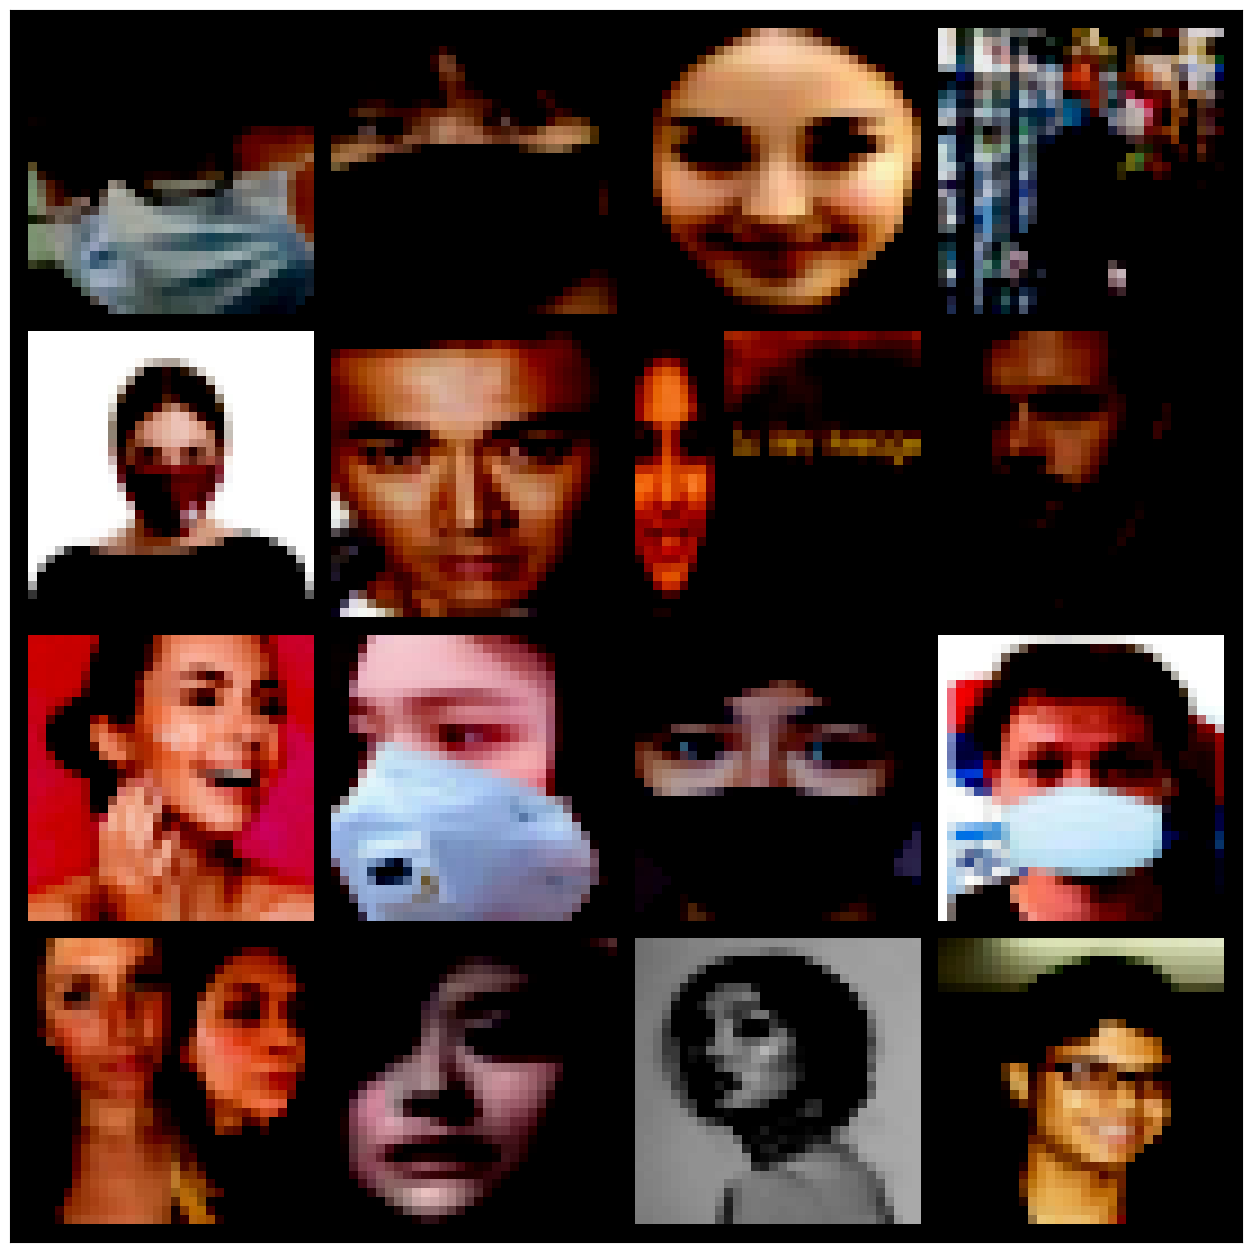

In [48]:
for images, labels in train_dl:
    fig, ax = plt.subplots(figsize = (16,16))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:16], nrow=4).permute(1,2,0))
    break

use py script

In [1]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

from LoadDataset.utils import (
    MaskDetectionDataSet,
    dataset_split,
    dataloader
)


In [2]:
data_dir = "../data"

In [3]:
dataset = MaskDetectionDataSet(data_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


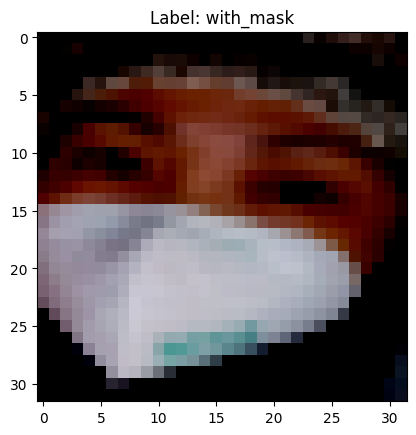

In [4]:
def show_example(data):
    classes = ['with_mask', 'without_mask']
    plt.imshow(data[0].permute(1,2,0))
    plt.title(f'Label: {classes[data[1]]}')

show_example(dataset[13])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


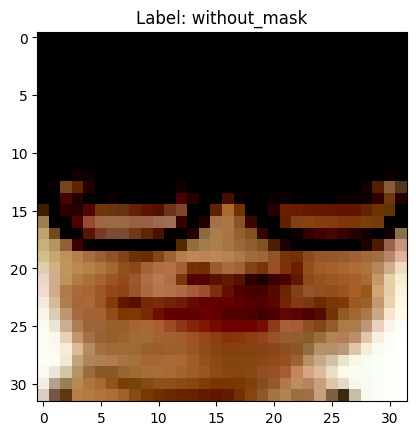

In [5]:
show_example(dataset[5000])

In [6]:
train_ds, valid_ds = dataset_split(dataset, val_ratio = 0.2)

In [7]:
train_dl = dataloader(train_ds, batch_size=32, shuffle=True)
valid_dl = dataloader(valid_ds, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


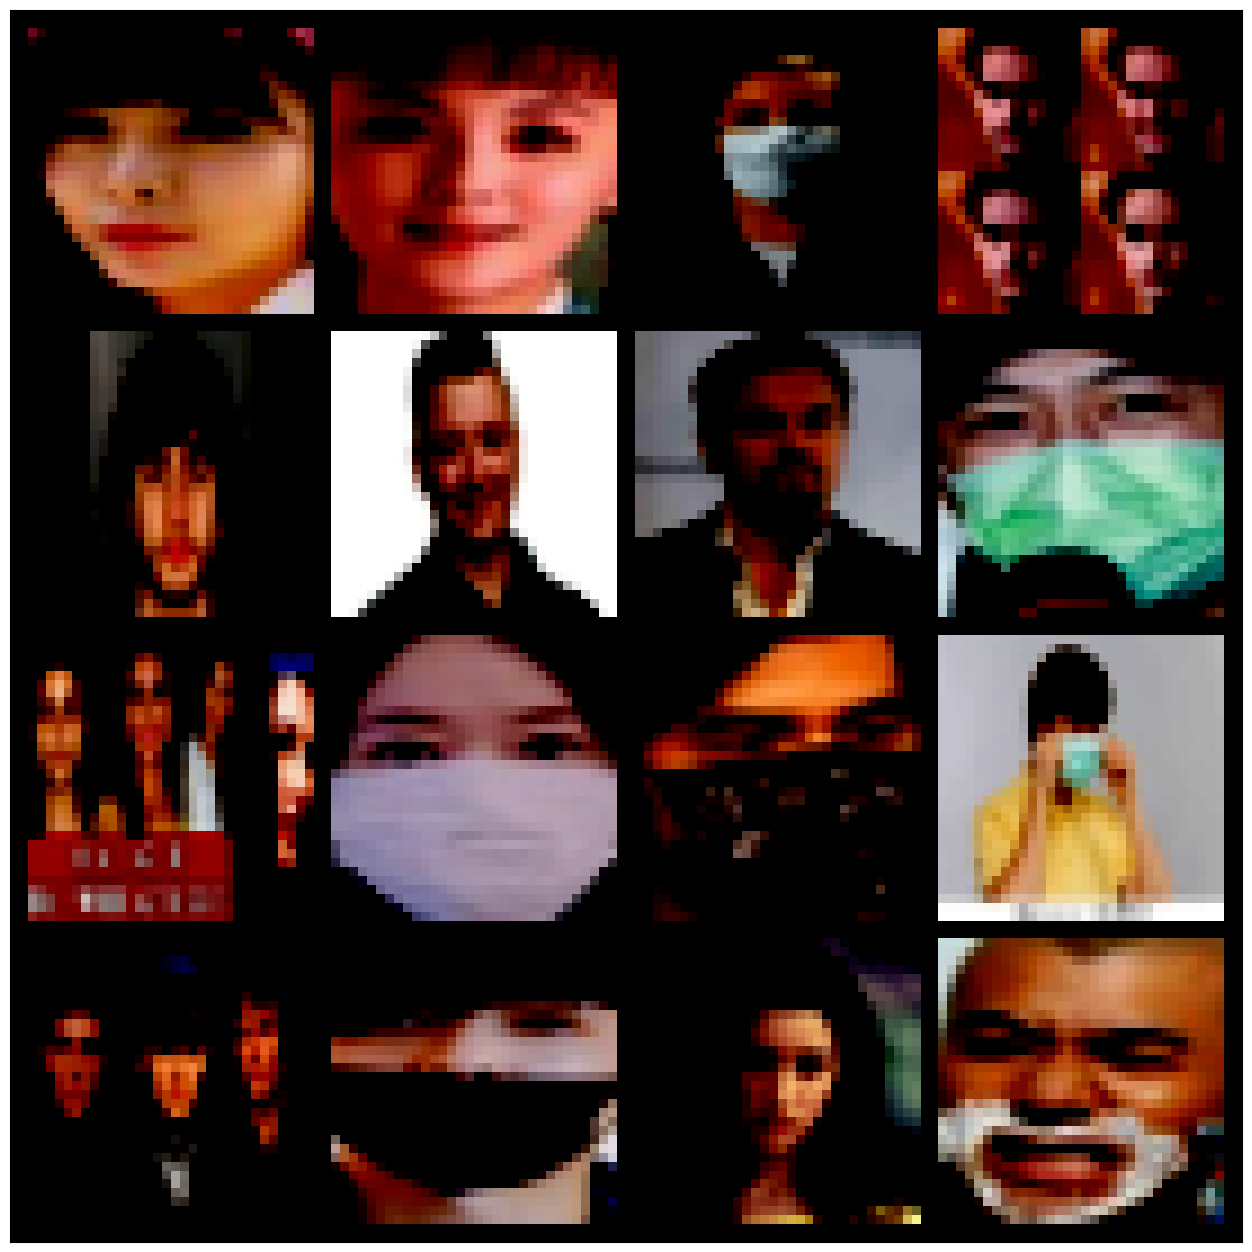

In [8]:
for images, labels in train_dl:
    fig, ax = plt.subplots(figsize = (16,16))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:16], nrow=4).permute(1,2,0))
    break